# Process Critical lines

In [1]:
%load_ext autoreload
%autoreload 2
%run ~/FKMC/notebooks/notebook_preamble.py
%matplotlib inline
np.seterr(under = 'ignore')
from time import time
from munch import munchify
%run ./matplotlib_fig_settings.py

from time import time
from operator import mul
from functools import reduce
from itertools import zip_longest
import multiprocessing as mp
import re

import scipy
from FKMC.general import index_histogram_array, sort_IPRs, smooth, shapes, normalise_IPR
from FKMC.import_funcs import shape_hints, timefmt

from FKMC.import_funcs import  mean_over_MCMC, IPRandDOS, extract, get_data_funcmap_chain_ext

Imported pathlib::Path, os, munch::Munch, pickle, logging, itertools::count, matplotlib::colors
Names are pyplot = plt, matplotlib = mpl, numpy = np


## cdw_TJ_critical_line.ipynb data
This data is a diagonal stripe on the TJ plot

### Import the data

In [2]:
%%time
from FKMC.import_funcs import incremental_load

functions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
]
cdw_TJ = incremental_load(folder = '~/HPC_data/cdw_TJ_critical_line', functions = functions, force_reload = False, loglevel = logging.INFO)

0 1 2 3 4 10 11 12 20 100 101 102 103 104 110 111 112 120 200 201 202 203 204 210 211 212 220 300 301 302 303 304 310 311 312 320 400 401 

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['flat', 'hints', 'processed_task_ids', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'chains', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Js', 'Ts', 'Mf_moments', 'time', 'accept_rates', 'proposal_rates', 'functions'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 20 chains of 1000 for 20000 with thinning = 10 for 2000 recorded steps
    Burn in: 1000
    Structure_names: {'Rs': 5, 'Js': 10, 'Ts': 10}
    Ns = [250 160 110]
    Runtimes: 
        Average: 16.0 hours
        Min: 1.0 hours
        Max: 3.0 days
        Total: 45.0 weeks
    
    


402 403 404 410 411 412 420 CPU times: user 727 ms, sys: 1.28 s, total: 2.01 s
Wall time: 4.36 s


In [3]:
%%time
import logging
from FKMC.import_funcs import incremental_load

functions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
]
cdw_TJ_finer = incremental_load(folder = '~/HPC_data/cdw_TJ_critical_line_finer',
                                functions = functions, force_reload = False,
                               loglevel = logging.INFO)

with open('/home/tch14/HPC_data/pickled_data/cdw_TJ_finer.pickle', 'wb') as file:
    pickle.dump(cdw_TJ_finer, file)

0 1 2 3 4 5 6 7 8 9 10 20 21 22 23 24 25 40 200 201 202 203 204 205 206 207 208 209 210 220 221 222 223 224 225 240 400 401 402 403 404 405 406 407 408 409 410 420 421 422 423 424 425 440 600 601 602 603 604 605 606 607 608 609 610 620 621 622 623 624 625 640 800 801 802 803 804 805 806 807 808 809 810 820 821 822 823 824 825 840 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1020 1021 1022 1023 1024 1025 1040 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1220 1221 1222 1223 1224 1225 1240 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1420 1421 1422 1423 1424 1425 1440 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1620 1621 1622 1623 1624 1625 1640 1800 1801 1802 1803 1804 1805 1806 1807 1808 1809 1810 1820 1821 1822 1823 1824 1825 1840 

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['flat', 'hints', 'processed_task_ids', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'chains', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Js', 'Ts', 'Mf_moments', 'time', 'accept_rates', 'proposal_rates', 'functions'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 11 chains of 1000 for 11000 with thinning = 10 for 1100 recorded steps
    Burn in: 1000
    Structure_names: {'Rs': 10, 'Js': 10, 'Ts': 20}
    Ns = [250 160 110]
    Runtimes: 
        Average: 12.0 hours
        Min: 1.0 hours
        Max: 2.0 days
        Total: 137.0 weeks
    
    


CPU times: user 1.5 s, sys: 2.53 s, total: 4.03 s
Wall time: 9.07 s


In [4]:
cdw_TJ_finer.hints.Mf_moments, cdw_TJ_finer.Mf_moments.shape

(('Ns', 'Rs', 'Js', 'Ts', 'nth moment'), (3, 10, 10, 20, 5))

/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice


(10, 20), (10, 20), (3, 10, 20)


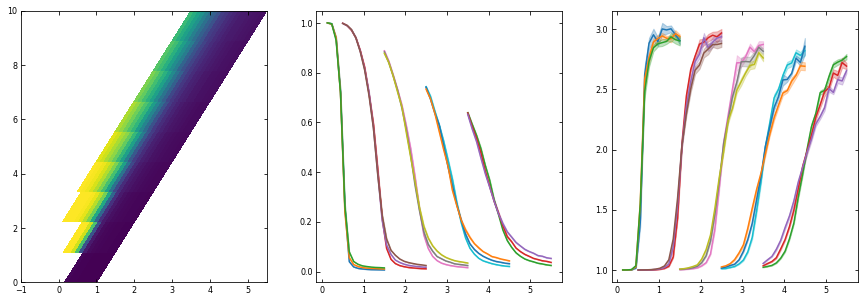

In [4]:
from scipy.stats import sem
d = cdw_TJ_finer

#mean before
M2 = np.nanmean(d.Mf_moments[:, :, :, :, 2], axis = 1)
M4 = np.nanmean(d.Mf_moments[:, :, :, :, 4], axis = 1)
dM2 = sem(d.Mf_moments[:, :, :, :, 2], axis = 1)
dM4 = sem(d.Mf_moments[:, :, :, :, 4], axis = 1)

B = M4 / M2**2
dB = B * np.sqrt((2*dM2/M2)**2 + (dM4 / M4)**2)


#mean after
fM2 = d.Mf_moments[:, :, :, :, 2]
fM4 = d.Mf_moments[:, :, :, :, 4]

B = np.nanmean(fM4 / fM2**2, axis = 1)
dB = sem(fM4 / fM2**2, axis = 1)
M2 = np.nanmean(fM2, axis = 1)
dM2 = sem(fM2, axis = 1)

n = 3
f, ax = plt.subplots(1,n, figsize = (n*5, 5), squeeze = False)

Js = d.Js[:, None] * np.ones_like(d.Ts)[None, :]
Ts = 2.25 * Js / 5 +  d.Ts[None, :]

shapes(Js, Ts, B)
ax[0, 0].pcolormesh(Ts, Js, M2[-1]) 

from FKMC.plotting import spread

J_i = 5

for J_i in range(1,10,2):
    for i, N in zip(count(), d.Ns):
        spread(ax[0,1], Ts[J_i], M2[i, J_i, :], dM2[i, J_i, :])
        spread(ax[0,2], Ts[J_i], B[i, J_i, :], dB[i, J_i, :])


(10, 20) (10, 20)
11
[0.44736842 0.55263158 0.65789474 0.76315789 0.86842105]
11
[0.94736842 1.05263158 1.15789474 1.26315789 1.36842105]
10
[1.34210526 1.44736842 1.55263158 1.65789474 1.76315789]
10
[1.84210526 1.94736842 2.05263158 2.15789474 2.26315789]
10
[2.34210526 2.44736842 2.55263158 2.65789474 2.76315789]
10
[2.84210526 2.94736842 3.05263158 3.15789474 3.26315789]
10
[3.34210526 3.44736842 3.55263158 3.65789474 3.76315789]
10
[3.84210526 3.94736842 4.05263158 4.15789474 4.26315789]
10
[4.34210526 4.44736842 4.55263158 4.65789474 4.76315789]


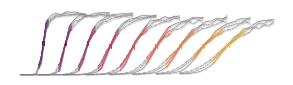

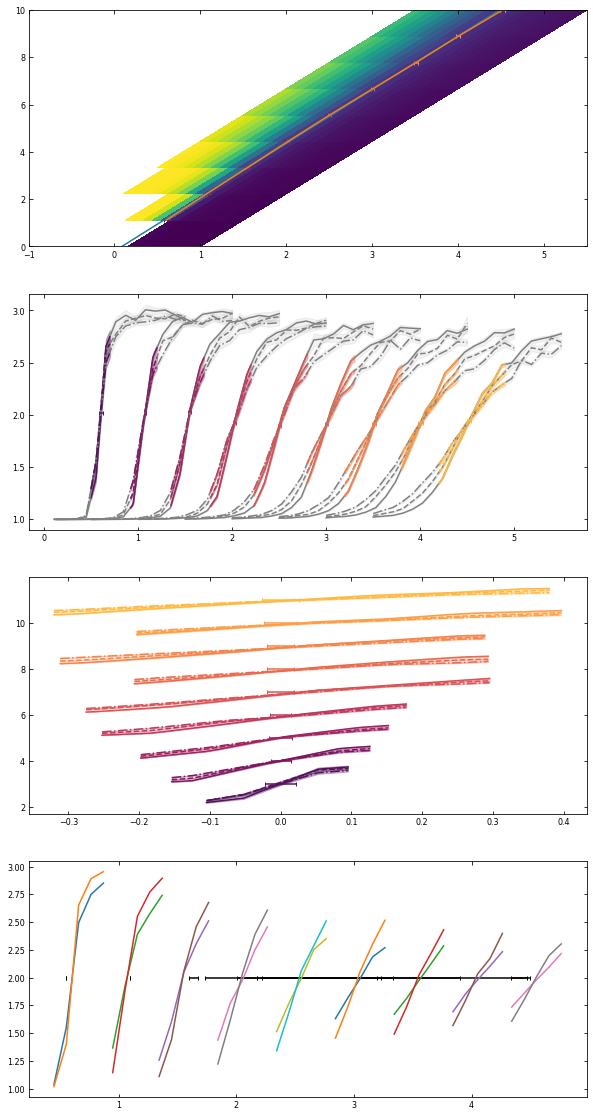

In [22]:
d = cdw_TJ_finer
from FKMC.general import find_zero_crossings, interp_x_position, get_nearby_index
from uncertainties import ufloat


def find_zero_crossings(f):
    'given a 1d array, finds the indices where f has a sign change or is 0'
    s = np.sign(f)
    ds = s[..., 0:-1] + s[..., 1:]
    z = np.where(ds == 0)[0]
    return z
    
def interp_x_position(f,x,zs):
    'given two arrays representing a function f evaluated at x and the index of a zero crossing z, interpolate to the expected value of x'
    xs = np.array([None for _ in zs])
    for i,z in zip(count(), zs):
        if (x[z+1] - x[z]) ==  0:
            xs[i] = x[z]
        if (f[z+1] - f[z]) == 0:
            xs[i] = x[z]
        else:
            m = (f[z+1] - f[z]) / (x[z+1] - x[z])
            xs[i] = x[z] - f[z]/m            
        
    return xs

n = len(d.Js)
sfig, sax = plt.subplots(1,1, figsize = (5, 1.3))
fig, (ax,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (10, 20))


from uncertainties import unumpy as unp

Js = d.Js[:, None] * np.ones_like(d.Ts)[None, :]
Ts = 2.25 * Js / 5 +  d.Ts[None, :]
print(Js.shape, Ts.shape)
ax.pcolormesh(Ts, Js, M2[-1]) 

Tcs = np.full(fill_value = np.NaN, shape = (len(d.Js)))
dTcs = np.full(fill_value = np.NaN, shape = (len(d.Js)))

fM2 = np.mean(d.Mf_moments[:, :, :, :, 2], axis = 1)
fM4 = np.mean(d.Mf_moments[:, :, :, :, 4], axis = 1)
B = fM4 / fM2**2
dB = sem(d.Mf_moments[:, :, :, :, 4] / d.Mf_moments[:, :, :, :, 2]**2, axis = 1)

T_interval = np.array(
[[0.00, 0.70 ],
 [0.50, 0.70],
 [0.92, 1.2],
 [1.35, 1.7],
 [1.77, 2.2],
 [2.23, 2.8],
 [2.8, 3.3],
 [3.2, 3.8],
 [3.80, 4.4],
 [4.20, 4.9],])

for J_i, c in zip(range(1,n), colors10):
    for i,j in (
        #(0,1), 
        (0,2),
        ):
        f = np.squeeze(B[j, J_i, :] - B[i, J_i, :])
        df = np.squeeze(np.sqrt(dB[j, J_i, :]**2 + dB[i, J_i, :]**2))
        
        #use linear interpolation to get more points
        Told = Ts[J_i]
        Tnew = np.linspace(T_interval[J_i, 0],T_interval[J_i, 1],20)
        fi = np.interp(x = Tnew, xp = Told, fp = f)
        dfi = np.interp(x = Tnew, xp = Told, fp = df)
        
        #get the indices of crossings
        k = find_zero_crossings(fi)
        
        #interpolate those indices into T values
        f = unp.uarray(fi, dfi)
        x = unp.uarray(Tnew, 0)
        Tc = interp_x_position(f,x,k)
        
        #for T in Tc:
            #ax.errorbar(T.n, d.Js[J_i], xerr = T.s, capsize = 2, color = c)
            #ax2.errorbar(T.n, 2, xerr = T.s, capsize = 2, color = c)
        
        if len(Tc) > 0:
            Tcm = Tc.mean()
            
            critB = np.interp(x = Tcm.n, xp = Told, fp = B[-1, J_i, :])
            ax.errorbar(Tcm.n, d.Js[J_i], xerr = Tcm.s, capsize = 2, color = c)
            ax2.errorbar(Tcm.n, critB, xerr = Tcm.s, capsize = 2, color = c)
            
            J = d.Js[J_i]
            Tcs[J_i] = Tcm.n
            dTcs[J_i] = Tcm.s
        else:
            Tcm = ufloat(np.NaN, np.NaN)
            
        #fit a straight line to each around the previous fit
        _, Tci = get_nearby_index(Told, Tcm.n)
        print(Tci)
        indx = np.arange(Tci-2, Tci+3)
        print(Told[indx])
        

        (a, b), pcov = np.polyfit(Told[indx], fi[indx], deg = 1, w=1/dfi[indx], cov=True)
        (da, db) = np.sqrt(np.diag(pcov))
        a = ufloat(a, da)
        b = ufloat(b, db)
        fit_Tc = -b/a
        #Tcs[J_i] = fit_Tc.n
        #dTcs[J_i] = fit_Tc.s
        ax4.plot(Told[indx], B[-1, J_i, indx])
        ax4.plot(Told[indx], B[0, J_i, indx])
        ax4.errorbar(fit_Tc.n, 2, xerr = fit_Tc.s, capsize = 2, color = 'black')
        

        for i, N, ls in zip(count(), d.Ns, ['-', '--', '-.']):
            spread(ax2, Told, B[i, J_i, :], dB[i, J_i, :], color = 'grey', linestyle = ls, alpha = 0.1)
        
            x = Tnew
            y = np.interp(x = Tnew, xp = Told, fp = B[i, J_i, :])
            dy = np.interp(x = Tnew, xp = Told, fp = dB[i, J_i, :])
            spread(ax2, x, y, dy, color = c, linestyle = ls)
            
            spread(ax3, x - Tcm.n, y + J_i, dy, color = c, linestyle = ls)
            
            spread(sax, Told + J_i*0, B[i, J_i, :], dB[i, J_i, :], color = 'grey', linestyle = ls, alpha = 0.2, linewidth = 0.5)
            spread(sax, x + J_i*0, y, dy, color = c, linestyle = ls, linewidth = 0.5)
            sax.errorbar(Tcm.n, critB, xerr = Tcm.s, capsize = 2, color = c)
        
        for T in Tc: ax3.errorbar(T.n - Tcm.n, 2 + J_i, xerr = T.s, capsize = 2, color = c)

indx = d.Js > 0
(a, b), pcov = np.polyfit(d.Js[indx], Tcs[indx], deg = 1, w=1/dTcs[indx], cov=True)
(da, db) = np.sqrt(np.diag(pcov))
ax.plot(b + a*d.Js, d.Js)
            
ax.plot(Tcs, d.Js)
data_location = Path('~/HPC_data/pickled_data').expanduser()
with open( data_location / 'TJ_phase_cdw_line.pickle', 'wb') as file: 
    line = dict(
        Js = d.Js,
        Ts = Tcs,
        dTs = dTcs,
        fit = Munch(a=a, b=b, da = da, db = db)
        )
    pickle.dump(line, file)

sax.axis('off')
sfig.savefig('Tcs.pdf')

In [ ]:
d = cdw_TJ_finer

n = len(d.Js)
f, (ax,ax2) = plt.subplots(1,2, figsize = (10, 5))
from FKMC.general import find_zero_crossings, interp_x_position
from uncertainties import unumpy as unp

critical_Ts = np.zeros(n)
critical_dTs = np.zeros(n)

Js = d.Js[:, None] * np.ones_like(d.Ts)[None, :]
Ts = 2.25 * Js / 5 +  d.Ts[None, :]
print(Js.shape, Ts.shape)
ax.pcolormesh(Ts, Js, M2[-1]) 

Tcs = np.full(fill_value = np.NaN, shape = (len(d.Rs), len(d.Js)))
dTcs = np.full(fill_value = np.NaN, shape = (len(d.Rs), len(d.Js)))

for R_i in range(10):
    for J_i in zip(range(1,n)):
        for i,j,c in (
            (0,1, 'g'), 
            (1,2, 'k'),
            ):

            fM2 = d.Mf_moments[:, R_i, :, :, 2]
            fM4 = d.Mf_moments[:, R_i, :, :, 4]
            B = fM4 / fM2**2
            
            dB = sem(d.Mf_moments[:, :, :, :, 4] / d.Mf_moments[:, :, :, :, 2]**2, axis = 1)

            print(B.shape, d.hints.Mf_moments)
            f = B[j, J_i, :] - B[i, J_i, :]
            df = dB[j, J_i, :] + dB[i, J_i, :]
            k = find_zero_crossings(f)

            f = np.squeeze(unp.uarray(f, df))
            print(f.shape, Ts[J_i].shape, k)
            Tc = interp_x_position(f,Ts[J_i],k)
            #Tc = Tc[(2 < Tc) & (Tc < 2.5)]
            print(Tc)
            if len(Tc) > 0:
                Tc = Tc.mean()
                critical_Ts[J_i] = Tc.n
                critical_dTs[J_i] = Tc.s
                J = d.Js[J_i]
                ax.errorbar(Tc.n, d.Js[J_i], xerr = Tc.s, capsize = 2, color = c)
                Tcs[R_i, J_i] = Tc.n
                dTcs[R_i, J_i] = Tc.s

            for i, N in zip(count(), d.Ns):
                spread(ax2, Ts[J_i], B[i, J_i, :][0], dB[i, J_i, :][0])
        
ax.plot(Tcs, d.Js)
data_location = Path('~/HPC_data/pickled_data').expanduser()
with open( data_location / 'TJ_phase_cdw_line.pickle', 'wb') as file: 
    line = dict(
        J = d.Js,
        T = critical_Ts,
        dT = critical_dTs,
        )
    pickle.dump(line, file)

## cdw_TU_critical_line.ipynb data
This data is a vertical stripe on the TU plot

### Import the data

In [19]:
%%time
from FKMC.import_funcs import incremental_load

functions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
]
cdw_TU = incremental_load(folder = '~/HPC_data/cdw_TU_critical_line', functions = functions, force_reload = False)

INFO:FKMC.import_funcs:looking in /rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line
DEBUG:FKMC.import_funcs:structure_names = ['Rs', 'Us', 'Ts']
DEBUG:FKMC.import_funcs:structure_dims = (5, 10, 10)


[PosixPath('/rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line/code/cdw_TU_critical_line.py')]
Ham_params:  t=1, alpha=1.25, mu=0, beta=varying, J=5, U=varying, normalise=True,


Tasks per chain: 5,

Each doing 1000 steps,

5000 total chain length,

500 samples,


MCMC_params:  N_steps=1000, N_burn_in=1000, thin=10, proposal=<function p_multi_site_uniform_reflect at 0x2b0db1c26e60>, accept_function=<function perturbation_accept at 0x2b0db1c32050>, warnings=False,


DEBUG:FKMC.import_funcs:Missing jobs, should all be up to 31
DEBUG:FKMC.import_funcs:task_id: chain_ids
DEBUG:FKMC.import_funcs:349: {0, 1, 2, 3, 4}
INFO:FKMC.import_funcs:Expected number of tasks 500
INFO:FKMC.import_funcs:Measured number of tasks 500
INFO:FKMC.import_funcs:Expected number of chains None
INFO:FKMC.import_funcs:Shortest Chain 5
INFO:FKMC.import_funcs:Longest Chain 32
INFO:FKMC.import_funcs:Using chain length 32
INFO:FKMC.import_funcs:Logger keys: ['Ns', 'parameters', 'MCMC_params', 'structure_names', 'structure_dimensions', 'chain_id', 'task_id', 'logs', 'allow_pickle', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params keys: ['N_steps', 'N_burn_in', 'thin', 'proposal', 'accept_function', 'warnings', 'state', 'logger'] 

INFO:FKMC.import_funcs:Overall steps = 3200
DEBUG:FKMC.import_funcs:[(0, 'Rs', 5), (1, 'Us', 10), (2, 'Ts', 10)]
DEBUG:FKMC.import_funcs:available observables = ['A', 'Fc', 'Ff', 'IPRs', 'Mf_moments', 'N_cumulants', 'N_sites', 'N_steps', 'Nc', 'Nf', 'accept_

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line/data/349_14.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line/data/349_6.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line/data/349_12.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line/data/349_8.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line/data/349_7.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line/data/349_5.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line/data/349_17.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/cdw_TU_critical_line/data/349_16.npz is expected but missing!
DEBUG:FKMC.i

348 349 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['functions', 'flat', 'hints', 'processed_task_ids', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'chains', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Us', 'Ts', 'Mf_moments', 'time', 'accept_rates', 'proposal_rates'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 32 chains of 1000 for 32000 with thinning = 10 for 3200 recorded steps
    Burn in: 1000
    Structure_names: {'Rs': 5, 'Us': 10, 'Ts': 10}
    Ns = [250 160 110]
    Runtimes: 
        Average: 13.0 hours
        Min: 1.0 hours
        Max: 2.0 days
        Total: 40.0 weeks
    


CPU times: user 25.9 s, sys: 11.9 s, total: 37.8 s
Wall time: 1min 31s


In [ ]:
cdw_TU.hints.Mf_moments, cdw_TU.Mf_moments.shape

In [56]:
%%time
from FKMC.import_funcs import incremental_load

functions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
]
cdw_TU_finer = incremental_load(folder = '~/HPC_data/cdw_TU_critical_line_finer', functions = functions, force_reload = False)

DEBUG:FKMC.import_funcs:todo: []
INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['flat', 'hints', 'processed_task_ids', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'chains', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Us', 'Ts', 'Mf_moments', 'time', 'accept_rates', 'proposal_rates', 'functions'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 10 chains of 1000 for 10000 with thinning = 10 for 1000 recorded steps
    Burn in: 1000
    Structure_names: {'Rs': 10, 'Us': 9, 'Ts': 10}
    Ns = [250 160 110]
    Runtimes: 
        Average: 4.0 hours
        Min: 1.0 hours
        Max: 10.0 hours
        Total: 21.0 weeks
    
    


CPU times: user 361 ms, sys: 944 ms, total: 1.3 s
Wall time: 10.4 s


(10, 20), (10,), (3, 9, 10)


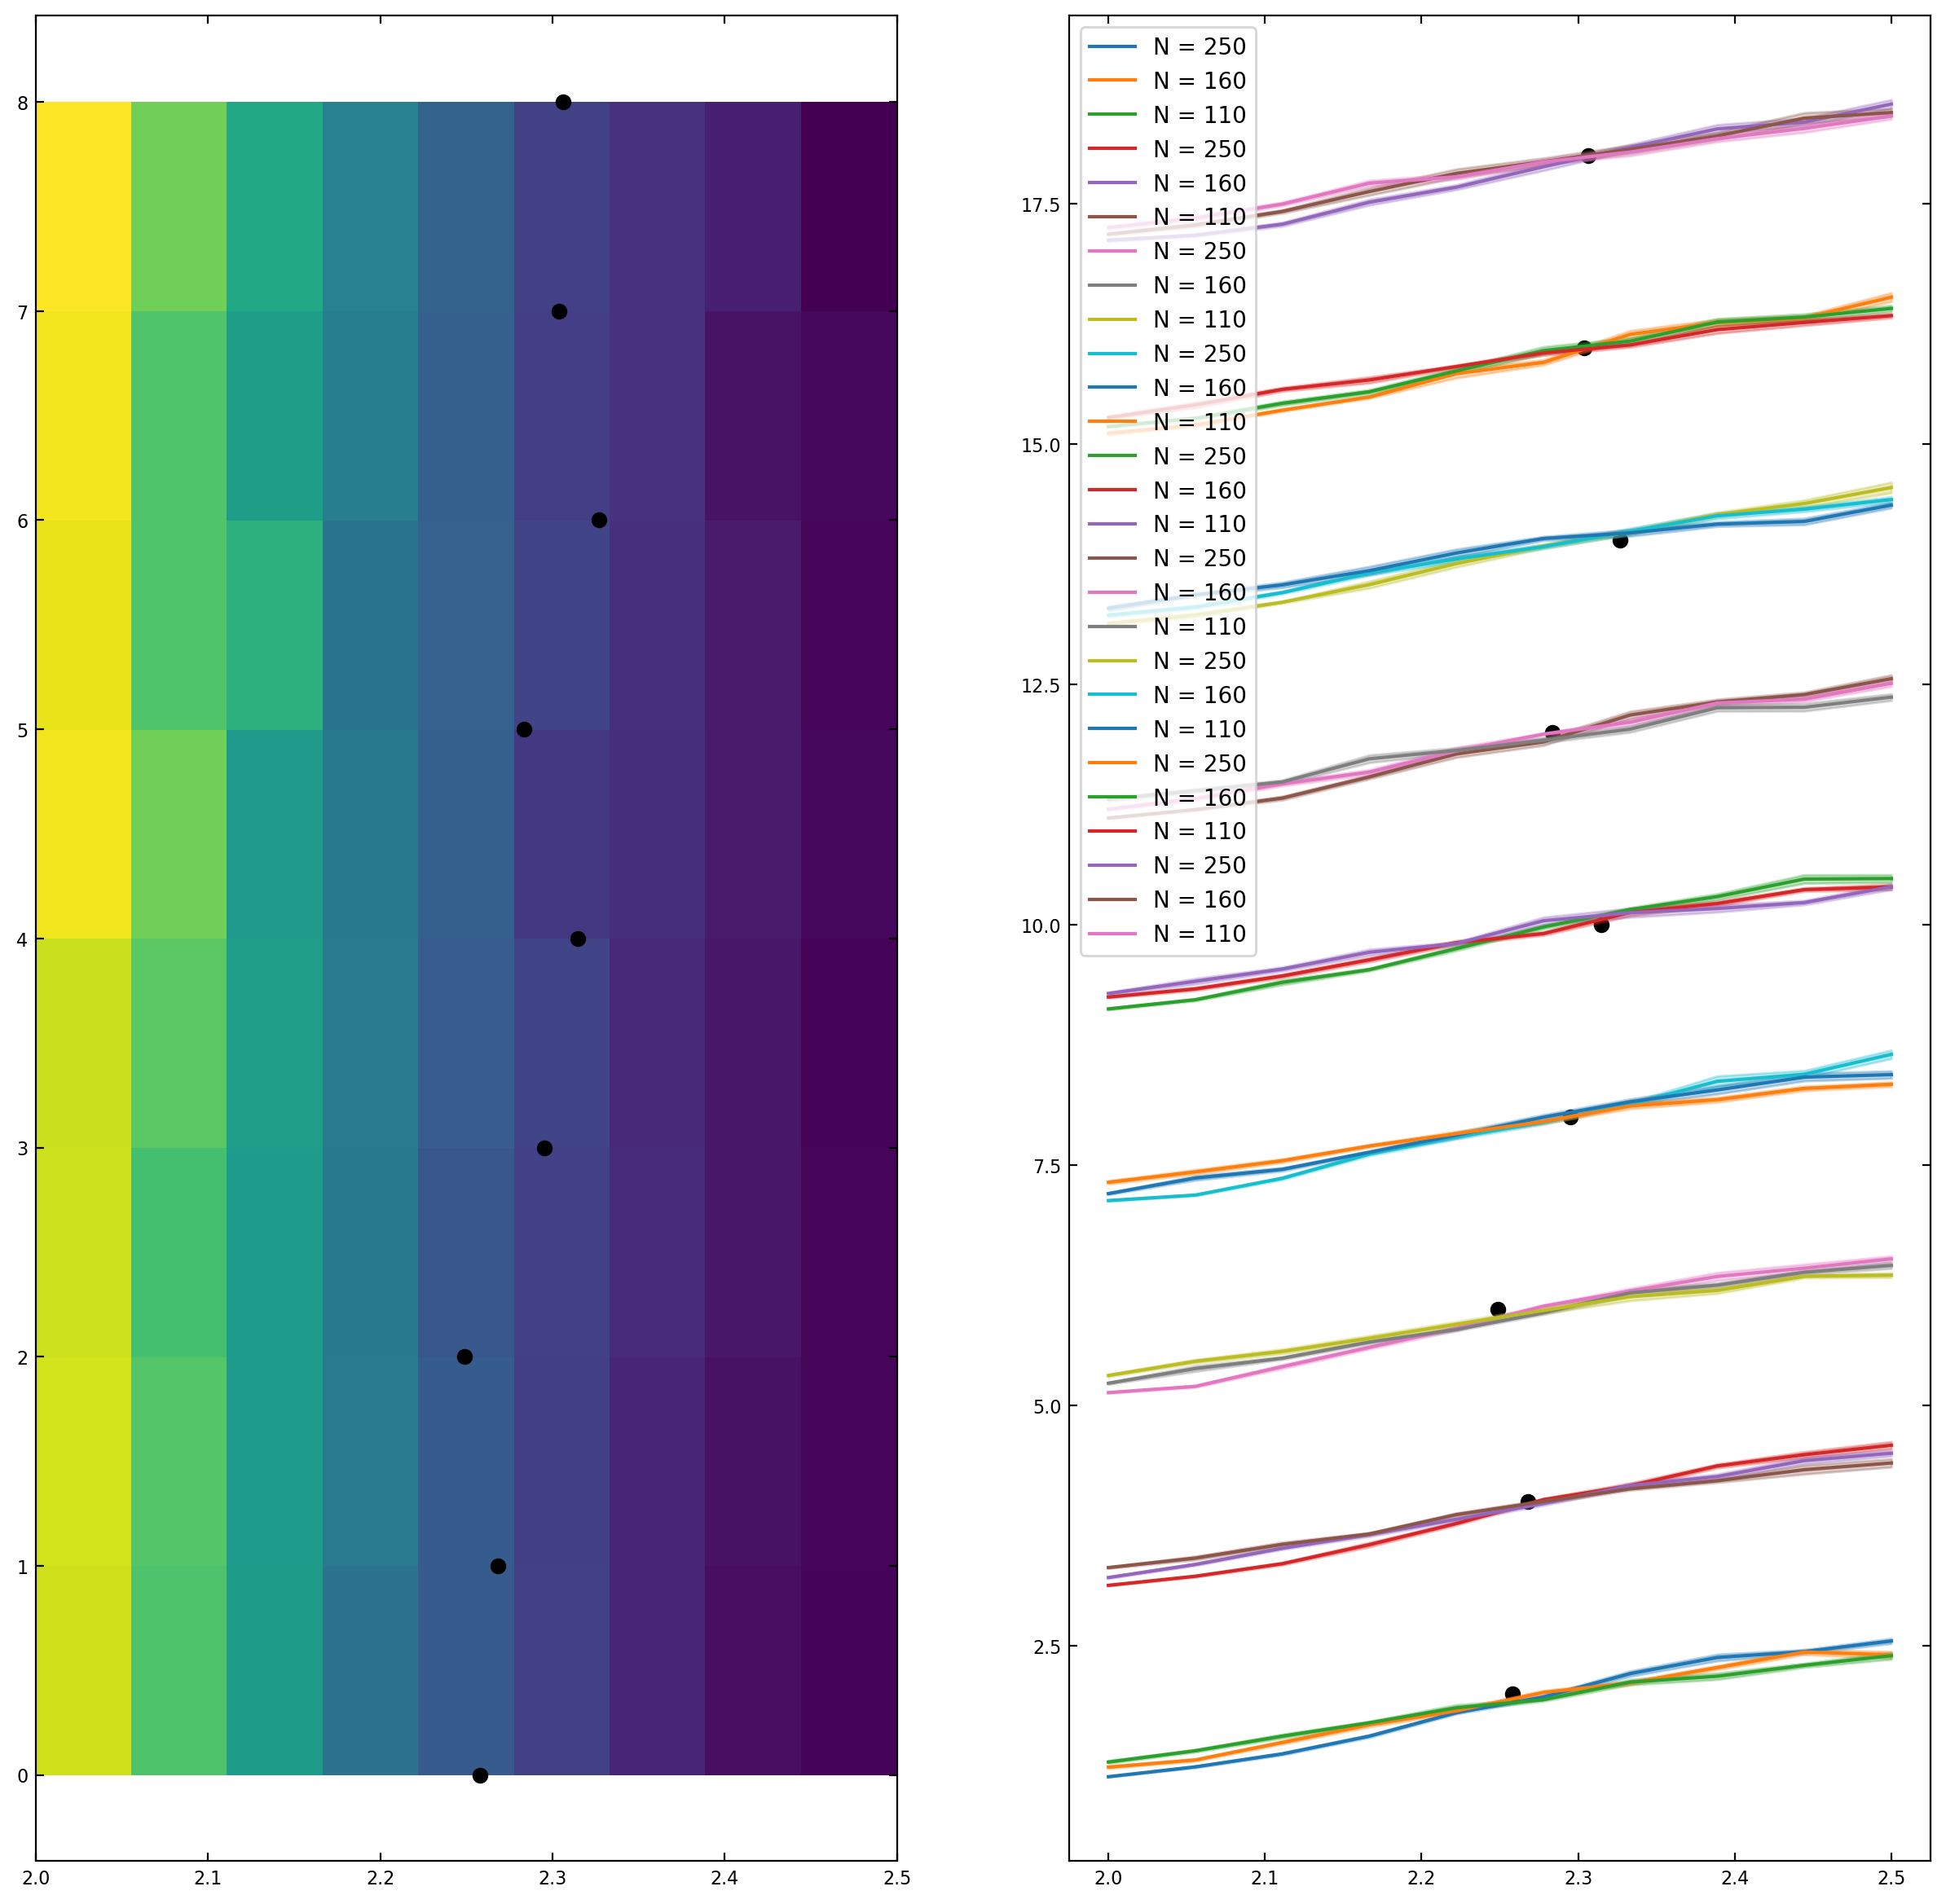

In [58]:
from scipy.stats import sem

d = cdw_TU_finer

#mean before
M2 = np.nanmean(d.Mf_moments[:, :, :, :, 2], axis = 1)
M4 = np.nanmean(d.Mf_moments[:, :, :, :, 4], axis = 1)
dM2 = sem(d.Mf_moments[:, :, :, :, 2], axis = 1)
dM4 = sem(d.Mf_moments[:, :, :, :, 4], axis = 1)

B = M4 / M2**2
dB = B * np.sqrt((2*dM2/M2)**2 + (dM4 / M4)**2)


#mean after, I think this makes more sense, these are independant estimates of B after all
M2 = d.Mf_moments[:, :, :, :, 2]
M4 = d.Mf_moments[:, :, :, :, 4]
B = np.nanmean(M4 / M2**2, axis = 1)
dB = sem(M4 / M2**2, axis = 1)
M2 = np.nanmean(M2, axis = 1)

n = 9
f, axes = plt.subplots(ncols = 2, figsize = (15, 15), squeeze = False)
axes = axes.flatten()

Us = d.Us
Ts = d.Ts

shapes(Js, Ts, B)
axes[0].pcolormesh(Ts, Us, M2[-1]) 

from FKMC.plotting import spread

U_i = 5

from FKMC.general import find_zero_crossings, interp_x_position

for U_i in range(0,9):
    for i,j,c in (
                  #(0,1,'k'),
                  #(1,2,'g'),
                  (0,2,'k'),
                 ):
        f = B[j, U_i, :] - B[i, U_i, :]
        k = find_zero_crossings(f)
        Tc = interp_x_position(f,Ts,k)
        Tc = Tc[(1.5 < Tc) & (Tc < 2.5)]
        
        axes[1].scatter(Tc, 2*U_i + 2, color = c)
        for t in Tc: axes[0].scatter(t,d.Us[U_i], color = c)
    
    for i, N in zip(count(), d.Ns):
        spread(axes[1], Ts, B[i, U_i, :] + 2*U_i, dB[i, U_i, :], label = f'N = {N}')
axes[-1].legend()

{'U': array([0., 1., 2., 3., 4., 5., 6., 7., 8.]), 'T': array([2.26532036, 2.2811533 , 2.25981031, 2.26550255, 2.29435835,
       2.28620814, 2.31315699, 2.32059085, 2.32297652]), 'dT': array([0.0065528 , 0.00716724, 0.00969644, 0.00807406, 0.00572642,
       0.007174  , 0.00656809, 0.00808544, 0.00712622]), 'meanT': array([3.65395067, 3.65395067, 3.65395067, 3.65395067, 3.65395067,
       3.65395067, 3.65395067, 3.65395067, 3.65395067, 3.65395067,
       3.65395067, 3.65395067, 3.65395067, 3.65395067, 3.65395067,
       3.65395067])}


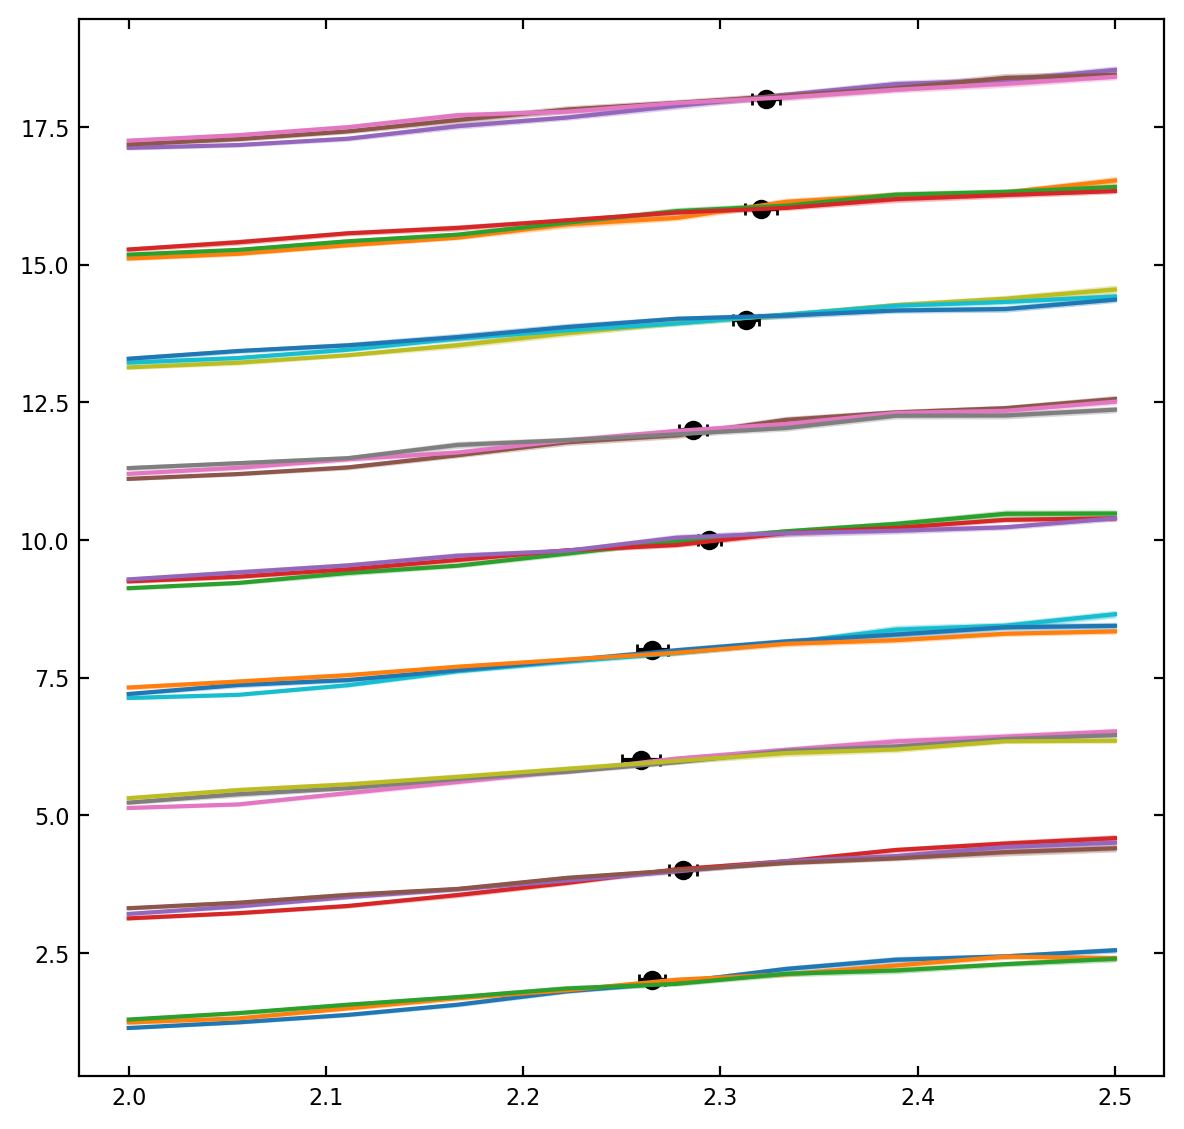

In [59]:
d = cdw_TU_finer
n = len(d.Us)
f, ax = plt.subplots(1,1, figsize = (7, 7))
from FKMC.general import find_zero_crossings, interp_x_position
from uncertainties import unumpy as unp

critical_Ts = np.zeros(n)
critical_dTs = np.zeros(n)

for U_i in range(0,n):
    for i,j,c in (
        (0,2, 'k'), 
        #(1,2, 'k'),
        ):
        
        f = B[j, U_i, :] - B[i, U_i, :]
        df = np.sqrt(dB[j, U_i, :]**2 + dB[i, U_i, :]**2)
        k = find_zero_crossings(f)
        
        uf = unp.uarray(f, df)
        Tc = interp_x_position(uf,Ts,k)
        Tc = Tc[(2 < Tc) & (Tc < 2.5)]
        if len(Tc) > 0:
            Tc = Tc.mean()
            critical_Ts[U_i] = Tc.n
            critical_dTs[U_i] = Tc.s
           
        #use linear interpolation
        _, Tci = get_nearby_index(Ts, 2.3)
        indx = np.arange(Tci-3, Tci+3)
        (a, b), pcov = np.polyfit(Ts[indx], f[indx], deg = 1, w=1/dfi[indx]**2, cov='unscaled')
        (da, db) = np.sqrt(np.diag(pcov))
        a = ufloat(a, da)
        b = ufloat(b, db)
        fit_Tc = -b/a
        critical_Ts[U_i] = fit_Tc.n
        critical_dTs[U_i] = fit_Tc.s
        
        ax.plot(critical_Ts[U_i], 2 + 2*U_i,  marker = 'o', color = c)
        ax.errorbar(critical_Ts[U_i], 2 + 2*U_i, xerr = critical_dTs[U_i], capsize = 2, color = c)

    
    for i, N in zip(count(), d.Ns):
        spread(ax, Ts, B[i, U_i, :] + 2*U_i, dB[i, U_i, :])
        #ax.scatter(Ts, B[i, U_i, :] + 2*U_i, dB[i, U_i, :])
        
data_location = Path('~/HPC_data/pickled_data').expanduser()
with open( data_location / 'TU_phase_cdw_line.pickle', 'wb') as file: 
    line = dict(
        U = d.Us,
        T = critical_Ts,
        dT = critical_dTs,
        meanT = np.ones_like(T) * np.mean(T),
        )
    pickle.dump(line, file)
    print(line)

## gap_gapped_TU_critical_line.ipynb data
This data is a horixontal stripe on the TU plot

### Import the data

In [ ]:
%%time
from FKMC.import_funcs import incremental_load

functions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
    IPRandDOS(),
]
gap_TU = incremental_load(folder = '~/HPC_data/gap_gapped_TU_critical_line', functions = functions, force_reload = False)

In [23]:
%%time
from FKMC.import_funcs import incremental_load

functions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
    IPRandDOS(),
]
gap_TU2 = incremental_load(folder = '~/HPC_data/gap_gapped_TU_critical_line_respaced', functions = functions, force_reload = False)

INFO:FKMC.import_funcs:looking in /rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced
DEBUG:FKMC.import_funcs:structure_names = ['Rs', 'Us', 'Ts']
DEBUG:FKMC.import_funcs:structure_dims = (10, 30, 10)
DEBUG:FKMC.import_funcs:Missing jobs, should all be up to 0
DEBUG:FKMC.import_funcs:task_id: chain_ids
INFO:FKMC.import_funcs:Expected number of tasks 3000
INFO:FKMC.import_funcs:Measured number of tasks 2960
INFO:FKMC.import_funcs:Expected number of chains None
INFO:FKMC.import_funcs:Shortest Chain 1
INFO:FKMC.import_funcs:Longest Chain 1
INFO:FKMC.import_funcs:Using chain length 1


[PosixPath('/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/code/gap_gapped_TU_critical_line_respaced.py')]
Ham_params:  t=1, alpha=1.25, mu=0, beta=varying, J=5, U=varying, normalise=True,


Tasks per chain: 20,

Each doing 5000 steps,

100000 total chain length,

10000 samples,


MCMC_params:  N_steps=5000, N_burn_in=5000, thin=10, proposal=<function p_multi_site_uniform_reflect at 0x2af689d60dd0>, accept_function=<function perturbation_accept at 0x2af689d69f80>, warnings=False,


INFO:FKMC.import_funcs:Logger keys: ['Ns', 'parameters', 'MCMC_params', 'structure_names', 'structure_dimensions', 'chain_id', 'task_id', 'logs', 'allow_pickle', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params keys: ['N_steps', 'N_burn_in', 'thin', 'proposal', 'accept_function', 'warnings', 'state', 'logger'] 

INFO:FKMC.import_funcs:Overall steps = 500
DEBUG:FKMC.import_funcs:[(0, 'Rs', 10), (1, 'Us', 30), (2, 'Ts', 10)]
DEBUG:FKMC.import_funcs:available observables = ['A', 'Fc', 'Ff', 'IPRs', 'Mf_moments', 'N_cumulants', 'N_sites', 'N_steps', 'Nc', 'Nf', 'accept_rates', 'classical_accept_rates', 'eigenval_bins', 'eigenvals', 'last_state', 'powers', 'proposal_rates', 'return_vals', 'start', 'state', 'time', 'update']
DEBUG:FKMC.import_funcs:Allocating space for the requested observables:
DEBUG:FKMC.import_funcs:observables.flat['Mf_moments'] = np.array(shape = (1, 3000, 5), dtype = float64) approx size: 0.00Gb
DEBUG:FKMC.import_funcs:observables.flat['IPRs'] = np.array(shape = (1, 3000, 

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/343_0.npz is expected but missing!


341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/377_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/378_0.npz is expected but missing!


375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/519_0.npz is expected but missing!


518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/574_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/575_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/576_0.npz is expected but missing!


572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/609_0.npz is expected but missing!


607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/639_0.npz is expected but missing!


638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/658_0.npz is expected but missing!


656 657 658 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/659_0.npz is expected but missing!


659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863 864 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/866_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/867_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/868_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/869_0.npz is expected but missing!


865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899 900 901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937 938 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953 954 955 956 957 958 959 960 961 962 963 964 965 966 967 968 969 970 971 972 973 974 975 976 977 978 979 980 981 982 983 984 985 986 987 988 989 990 991 992 993 994 995 996 997 998 999 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1014_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1015_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1016_0.npz is expected but missing!


1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1154_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1155_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1156_0.npz is expected but missing!


1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1295_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1296_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1297_0.npz is expected but missing!


1293 1294 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485 1486 1487 1488 1489 1490 1491 1492 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1677_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1678_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1679_0.npz is expected but missing!


1676 1677 1678 1679 1680 1681 1682 1683 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1686_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1687_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1688_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1689_0.npz is expected but missing!


1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1697_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1698_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1699_0.npz is expected but missing!


1696 1697 1698 1699 1700 1701 1702 1703 1704 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1706_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/1707_0.npz is expected but missing!


1705 1706 1707 1708 1709 1710 1711 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724 1725 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735 1736 1737 1738 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/2968_0.npz is expected but missing!
DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/2969_0.npz is expected but missing!


2966 2967 2968 2969 2970 2971 2972 2973 2974 2975 2976 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/2978_0.npz is expected but missing!


2977 2978 2979 2980 2981 2982 2983 2984 2985 2986 2987 

DEBUG:FKMC.import_funcs:/rds/general/user/tch14/home/HPC_data/gap_gapped_TU_critical_line_respaced/data/2989_0.npz is expected but missing!


2988 2989 2990 2991 2992 2993 2994 2995 2996 2997 2998 2999 

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['functions', 'flat', 'hints', 'processed_task_ids', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'chains', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'E_bins', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Us', 'Ts', 'Mf_moments', 'DOS', 'IPR', 'dDOS', 'dIPR', 'time', 'accept_rates', 'proposal_rates'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 1 chains of 5000 for 5000 with thinning = 10 for 500 recorded steps
    Burn in: 5000
    Structure_names: {'Rs': 10, 'Us': 30, 'Ts': 10}
    Ns = [250]
    Runtimes: 
        Average: 6.0 hours
        Min: 1.0 hours
        Max: 14.0 hours
        Total: 110.0 weeks
    


CPU times: user 11min 17s, sys: 2min 27s, total: 13min 44s
Wall time: 9min 18s


In [ ]:
gap_TU.Us

166.66666666666038


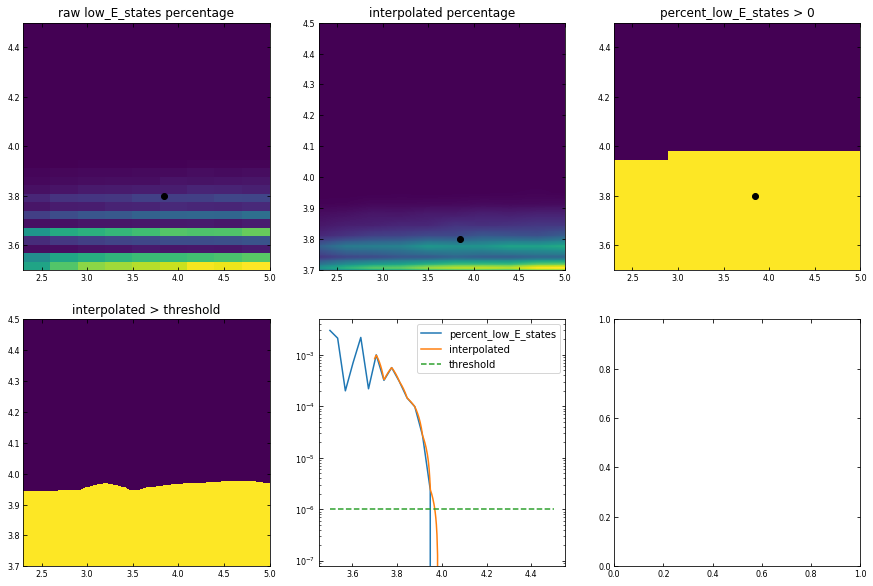

In [29]:
def spline_interpolate(Us, Ts, Y, newgrid):
    from scipy.interpolate import RectBivariateSpline
    o = Munch(
        gridUs = newgrid[0],
        gridTs = newgrid[1],
        Us = newgrid[0, :, 0],
        Ts = newgrid[1, 0, :],
    )
    o.Y = RectBivariateSpline(Us, Ts, Y, kx = 3, ky = 3, s = 0.00001)(o.Us, o.Ts, grid = True)
    return o
    
def linear_interpolate(Us, Ts, Y, newgrid):
    from scipy.interpolate import RegularGridInterpolator
    o = Munch(
        gridUs = newgrid[0],
        gridTs = newgrid[1],
        Us = newgrid[0, :, 0],
        Ts = newgrid[1, 0, :],
    )
    
    positions = np.vstack([o.gridUs.ravel(), o.gridTs.ravel()]).T
    o.Y = RegularGridInterpolator((Us, Ts), Y)(positions).reshape([o.Us.size, o.Ts.size])
    return o

d = gap_TU2
Ui = 10
Ti = 5

e = 0.01
ix = (-e < d.E_bins[:-1] ) & (d.E_bins[:-1] < e)

DOS = np.nanmean(d.DOS[-1, :, :, :, :], axis = 0)
normalisation = DOS.sum(axis = -1)[0, 0]
print(normalisation)
percent_low_E_states = DOS[:, :, ix].sum(axis = -1) / normalisation

single = np.nanmean(d.DOS[-1, :, Ui, Ti, :], axis = 0)

f, ax = plt.subplots(nrows = 2,ncols = 3, figsize = (15, 10), gridspec_kw = dict())
ax = ax.flatten()

ax[0].set(title = 'raw low_E_states percentage')
ax[0].pcolormesh(d.Ts, d.Us, percent_low_E_states, linewidth=0, rasterized = True)

threshold = 0.0001 / 100
newgrid = np.mgrid[3.7:4.5:300j, 2.3:5:300j]
interpolated = linear_interpolate(d.Us, d.Ts, percent_low_E_states, newgrid)

ax[1].set(title = 'interpolated percentage')
ax[1].pcolormesh(interpolated.Ts, interpolated.Us, interpolated.Y, linewidth=0, rasterized = True)

ax[2].set(title = 'percent_low_E_states > 0')
ax[2].pcolormesh(d.Ts, d.Us, (percent_low_E_states > 0), linewidth=0, rasterized = True)

ax[3].set(title = 'interpolated > threshold')
ax[3].pcolormesh(interpolated.Ts, interpolated.Us, (interpolated.Y > threshold), linewidth=0, rasterized = True)


from FKMC.general import get_nearby_index
T = 4

T, i = get_nearby_index(d.Ts, T)
ax[4].plot(d.Us, percent_low_E_states[:, i], label = 'percent_low_E_states')

T, i = get_nearby_index(interpolated.Ts, T)
ax[4].plot(interpolated.Us, interpolated.Y[:, i], label = 'interpolated')


ax[0].plot([d.Us[Ui],], [d.Ts[Ti],], marker = 'o', color = 'k')
ax[1].plot([d.Us[Ui],], [d.Ts[Ti],], marker = 'o', color = 'k')
ax[2].plot([d.Us[Ui],], [d.Ts[Ti],], marker = 'o', color = 'k')

ax[4].plot((3.5, 4.5), (threshold, threshold), '--', label = 'threshold')
ax[4].set(yscale = 'log')
ax[4].legend()

e = 0.01, threshold = 1e-06
166.66666666666035
166.66666666666035


/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


166.66666666666038
166.66666666666032
166.66666666666035
166.66666666666035
166.66666666666038
166.66666666666038
166.66666666666032
166.66666666666038


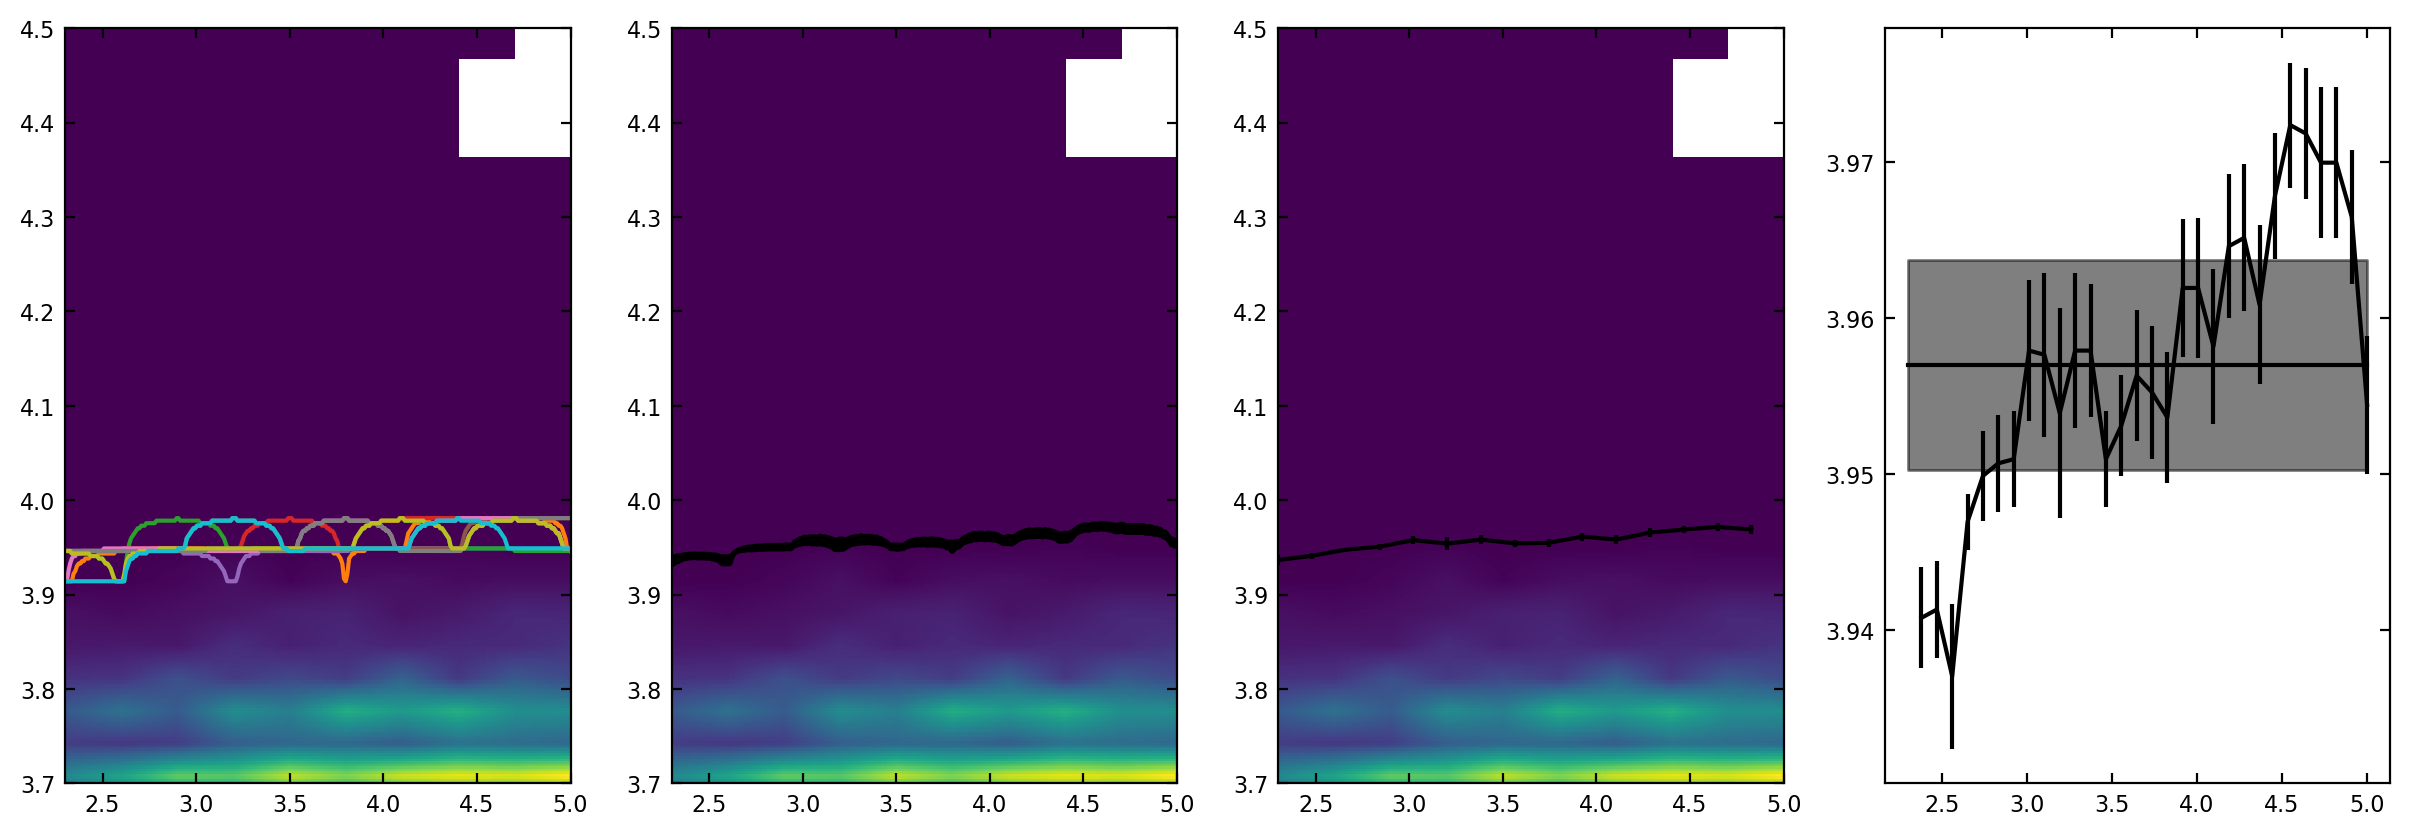

In [54]:
d = gap_TU2
#the width of the energy bin to use
e = 0.01
#threshold = 0.00001 / 100
print(f'e = {e}, threshold = {threshold}')

f, (ax, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (15, 5), gridspec_kw = dict())
for a in (ax, ax2, ax3): a.pcolormesh(interpolated.Ts, interpolated.Us, interpolated.Y, linewidth=0, rasterized = True)
edgeUs = []

def extract_edge(U, T, Y):
    #uses the fact that argmax returns the position of the first "True" value
    #uses [:, ::-1] because we want the last along the U axis
    #but that gives us it measured from the end, so use it as a negative index
    edge = -np.argmax((Y == 1)[:, ::-1], axis = 1)
    nonzero = (edge != 0)
    edgeU = U[edge[nonzero]]
    edgeT = T[nonzero]
    
    return edgeU, edgeT

for i in d.Rs:
    #the indices of that energy bin into the data
    ix = (-e < d.E_bins[:-1] ) & (d.E_bins[:-1] < e)

    DOS = d.DOS[-1, i, :, :, :]

    #the observed number of states
    normalisation = DOS.sum(axis = -1)[0, 0]
    print(normalisation)

    #the percentage of states near 0
    percent_low_E_states = DOS[:, :, ix].sum(axis = -1) / normalisation
    newgrid = np.mgrid[3.7:4.5:300j, 2.3:5:300j]
    
    interpolated = linear_interpolate(d.Us, d.Ts, percent_low_E_states, newgrid)
    #interpolated = spline_interpolate(d.Us, d.Ts, percent_low_E_states, newgrid)
    
    #do it without any interpolation
    #edgeU, edgeT = extract_edge(d.Us, d.Ts, (percent_low_E_states.T > 0) & (M2 < 0.7))
    
    edgeU, edgeT = extract_edge(interpolated.Us, interpolated.Ts, interpolated.Y.T > threshold)
    
    #pcol = ax.pcolormesh(interpolated.Ts, interpolated.Us, interpolated.Y, linewidth=0, rasterized = True, alpha = 1)
    ax.plot(edgeT, edgeU, alpha = 1)
    edgeUs.append(edgeU)
    
edgeUs = np.array(edgeUs)
spread(ax2, edgeT, edgeUs.mean(axis = 0), dY = sem(edgeUs, axis = 0), alpha = 1, color = 'k')

U = edgeUs.mean(axis = 0)[::20]
dU = sem(edgeUs, axis = 0)[::20]
T = edgeT[::20]
ax3.errorbar(T, U, yerr = dU, alpha = 1, color = 'k')

ax4.errorbar(edgeT[9::10], edgeUs.mean(axis = 0)[9::10], yerr = sem(edgeUs, axis = 0)[9::10], alpha = 1, color = 'k')
spread(ax4, edgeT, edgeUs.mean()*np.ones_like(edgeT), dY = sem(edgeUs, axis = 0).max(), alpha = 0.5, color = 'k')

#use a simple mean for the critical line with error bars of sem(edgeUs, axis = 0).max()
meanU = edgeUs.mean()*np.ones_like(edgeT)[::5]
dU = sem(edgeUs, axis = 0).max()
T = edgeT[::5]

#use a simple mean for the critical line with error bars of sem(edgeUs, axis = 0).max()
U = edgeUs.mean(axis = 0)
dU = sem(edgeUs, axis = 0)
T = edgeT
a = np.array([U, dU, T])
#NB doing a[:, None, -1] takes the shape of a from (M,N) to (M,1) rather than the usual (M,)
U,dU,T = np.concatenate([a[:, ::20], a[:, None, -1]], axis = 1)
    
data_location = Path('~/HPC_data/pickled_data').expanduser()
with open( data_location / 'TU_phase_gap_gapless_line.pickle', 'wb') as file: 
    line = dict(
        energy_interval = e,
        DOS = DOS,
        M2 = M2,
        percent_low_E_states = percent_low_E_states,
        U = U,
        meanU = meanU,
        T = T,
        dU = dU,
        )
    pickle.dump(line, file)

<Figure size 1200x800 with 0 Axes>

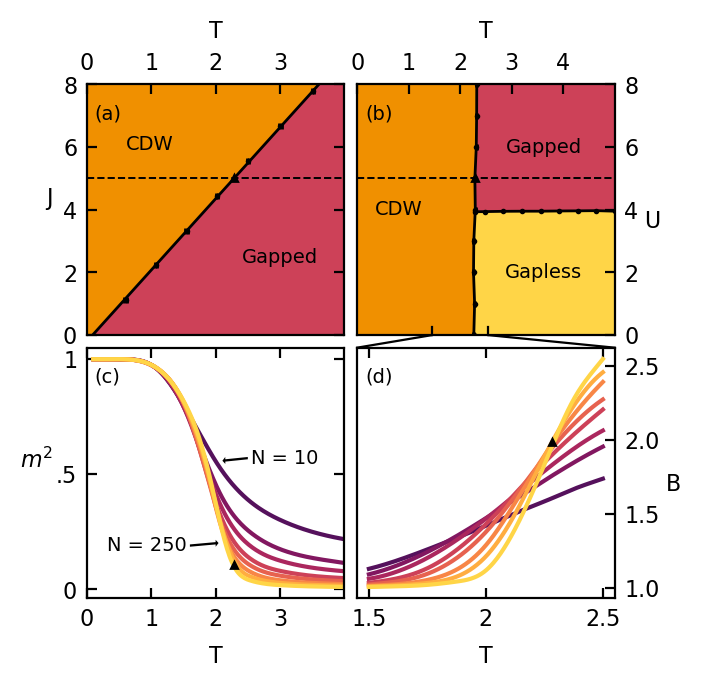

In [53]:
%run ./matplotlib_fig_settings.py
data_location = Path('~/HPC_data/pickled_data').expanduser()
from matplotlib.colors import to_rgba

cdw_color = to_rgba('#f09000')
gapped_color = to_rgba('#00afdb')
gapless_color = to_rgba('#e1a3f0')

#Sohpie's colour scheme
gapped_color = colors[3]
gapless_color = colors[-1]

#gapless_color = '#75c9f0' #light blue
#gapless_color = '#ea623b' #half way between cdw orange and colors[3]

cdw_gapped_midpoint = np.mean([cdw_color, gapped_color], axis = 0)

Tc = 2.25

from scipy.interpolate import interp1d, UnivariateSpline

def binder(ax):
    with open(data_location / 'binder_data.pickle', 'rb') as file: 
        d = oBinder = Munch(pickle.load(file))
    
    for i, N, c in zip(count(), d.Ns, colors):
        d.dB[i] = np.maximum(d.dB[i], d.dB[i].mean() * 0.1)
        binder_interped = UnivariateSpline(d.BX, d.B[i], w = 1/d.dB[i], s = len(d.BX))
        x = np.linspace(d.BX[0], d.BX[-1], 200)
        ax.plot(x, binder_interped(x), color = c)
        
    ax.set_ylabel('B', rotation=0, labelpad=5)
    ax.set_xlabel('T', rotation=0, labelpad=5)
        
def orderparam(ax):
    with open(data_location / 'binder_data.pickle', 'rb') as file: 
        d = oBinder = Munch(pickle.load(file))
    
    for i, N, c in zip(count(), d.Ns, colors):
        d.dM2[i] = np.maximum(d.dM2[i], d.dM2[i].mean() * 0.1)
        M_interped = UnivariateSpline(d.MX, d.M2[i], w = 1/(d.dM2[i] + 0.01*max(d.dM2[i])), s = len(d.MX))
        #axes[0].plot(d.MX, d.M2[i], linewidth = 1, color = c)
        #axes[0].errorbar(d.MX, d.M2[i], yerr = d.dM2[i] * 2, color = c, linestyle = "None", marker = '|', markersize = 0.5, label = f'N = {N}')

        x = np.linspace(d.MX[0], d.MX[-1], 200)
        ax.plot(x, M_interped(x), color = c)
        #spread(axes[0], d.MX, d.M2[i], d.dM2[i], alpha = 0.3, label = f'N = {N}', color = color)
        
        ax.set_ylabel('$m^2$', rotation=0, labelpad=7)
        ax.set_xlabel('T', rotation=0, labelpad=5)

def TJ_phase_diagram_T(ax):
    with open(data_location / 'TJ_phase_data.pickle', 'rb') as file: 
        TJ_data = pickle.load(file)   
        
    
    with open(data_location / 'TJ_phase_cdw_line.pickle', 'rb') as file: 
        crit_line = Munch(pickle.load(file))

    crit_fit_line = Munch(Ts = crit_line.fit.a*TJ_data.Js + crit_line.fit.b, Js = TJ_data.Js)
    
    ax.fill_betweenx(crit_fit_line.Js, x1 = 0, x2 = crit_fit_line.Ts, color = cdw_color)
    ax.fill_between(crit_fit_line.Ts, crit_fit_line.Js, color = gapped_color)
    ax.plot(crit_fit_line.Ts, crit_fit_line.Js,  color = 'black', marker = None, markersize = 0, linewidth = 1, linestyle = 'solid')
    
    ax.plot(crit_line.Ts, crit_line.Js,  color = 'black', marker = '.', markersize = 2, linewidth = 0)
    ax.errorbar(crit_line.Ts, crit_line.Js, xerr = crit_line.dTs, color = 'k', linewidth = 0.5, capsize = 1, linestyle = '')
        
    
    #pcol.set_edgecolor('face')
    ax.set(xlim = (0.1, 5), ylim = (0,10))
    ax.set_ylabel('J', rotation=0, labelpad=5)
    ax.set_xlabel('T', rotation=0, labelpad=5)
    
    ax.text(0.15, 0.8, "CDW", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')

    ax.text(0.6, 0.35, "Gapped", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')

def TU_phase_diagram_T(ax):
    with open( data_location / 'TU_phase_data.pickle', 'rb') as file: 
        TU_data = pickle.load(file)   
        
    with open(data_location / 'TU_phase_gap_gapless_line.pickle', 'rb') as file: 
        gapped_gapless_line = Munch(pickle.load(file))
    
    with open(data_location / 'TU_phase_cdw_line.pickle', 'rb') as file: 
        cdw_line = Munch(pickle.load(file))
    
    
    from matplotlib.colors import LinearSegmentedColormap
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    colors = [(1,1,1,1), cdw_color]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)

    #### Critical Lines ################
    try:
        ix = gapped_gapless_line.T > p.Tc
        
        #tack on an extra point to the gap-gappless critical line to make it meet the cdw line
        gapped_gapless_line.U = np.concatenate([[gapped_gapless_line.U[ix][0]], gapped_gapless_line.U[ix]])[::2]
        gapped_gapless_line.T = np.concatenate([[p.Tc,], gapped_gapless_line.T[ix]])[::2]
        gapped_gapless_line.dU = np.concatenate([[gapped_gapless_line.dU[ix][0]], gapped_gapless_line.dU[ix]])[::2]
    
        ax.plot(gapped_gapless_line.T, gapped_gapless_line.U, color = 'black', marker = '.', markersize = 2, linewidth = 1)
        ax.errorbar(gapped_gapless_line.T, gapped_gapless_line.U, yerr = gapped_gapless_line.dU, color = 'k', linestyle = '')
        
        ax.plot(cdw_line.T, cdw_line.U,  color = 'black', marker = '.', markersize = 2, linewidth = 1)
        ax.errorbar(cdw_line.T, cdw_line.U, xerr = cdw_line.dT, color = 'k', linestyle = '', capsize = 1, linewidth = 1)
        
        #make a polygon for the gapped region starting from top right corner
        #               top right                   left edge                             bottom edge           bottom right
        T = np.concatenate([[5,], cdw_line.T[cdw_line.U > gapped_gapless_line.U[0]][::-1], gapped_gapless_line.T, [5,]])
        U = np.concatenate([[8,], cdw_line.U[cdw_line.U > gapped_gapless_line.U[0]][::-1], gapped_gapless_line.U, [4,]])
        xy = np.array([T,U]).T
        poly = mpl.patches.Polygon(xy, closed=True, fill=True, facecolor = gapped_color, edgecolor = None)
        ax.add_artist(poly)
        
        #make a polygon for the gappless region starting from top left
        #               
        T = np.concatenate([cdw_line.T[cdw_line.U < gapped_gapless_line.U[0]][::-1], [5,5], gapped_gapless_line.T[::-1]])
        U = np.concatenate([cdw_line.U[cdw_line.U < gapped_gapless_line.U[0]][::-1], [0,4], gapped_gapless_line.U[::-1]])
        xy = np.array([T,U]).T
        poly = mpl.patches.Polygon(xy, closed=True, fill=True, facecolor = gapless_color, edgecolor = None)
        ax.add_artist(poly)
        
        #make a polygon for the cdw region starting from top left
        #               
        T = np.concatenate([[0,0], cdw_line.T])
        U = np.concatenate([[8,0],cdw_line.U])
        xy = np.array([T,U]).T
        poly = mpl.patches.Polygon(xy, closed=True, fill=True, facecolor = cdw_color, edgecolor = None)
        ax.add_artist(poly)
        
        
    except AssertionError:
        pass
    ##### Text ##########################
    
    ax.set_ylabel('U', rotation=0, labelpad=5)
    ax.set_xlabel('T', rotation=0, labelpad=5)
    
    ax.set(ylim = (0,8), xlim = (0.1,5))
    
    ax.text(0.8, 4, "CDW", transform=ax.transData,
            fontsize=7, fontweight='normal', va='center', ha = 'center')

    ax.text((Tc+5)/2, 6, "Gapped", transform=ax.transData,
            fontsize=7, fontweight='normal', va='center', ha = 'center')
    
    ax.text((Tc+5)/2, 2, "Gapless", transform=ax.transData,
        fontsize=7, fontweight='normal', va='center', ha = 'center')
    

f, axes = plt.subplots(2,2, gridspec_kw = dict(wspace = 0.05, hspace = 0.05))
axes = axes.flatten()
    
#the point at the binder crossing
p = Munch(J = 5, U = 5)

with open(data_location / 'TJ_phase_cdw_line.pickle', 'rb') as file: 
    crit_line = Munch(pickle.load(file))
p.Tc = crit_line.fit.a*5 + crit_line.fit.b

with open(data_location / 'binder_data.pickle', 'rb') as file: 
    d = oBinder = Munch(pickle.load(file))
p.B = np.interp(p.Tc, d.BX, d.B[-1]) 
p.m2 = np.interp(p.Tc, d.MX, d.M2[-1])
    
TJax = axes[0]
TUax = axes[1]
m2ax = axes[2]
binderax = axes[3]


##### The PT diagrams
TJ_phase_diagram_T(TJax)
TU_phase_diagram_T(TUax)
binder(binderax)
orderparam(m2ax)

## the triangular critical point marker
m = Munch(marker = '^', markersize = 2, color = 'black')
binderax.plot([p.Tc,], [p.B,], **m)
m2ax.plot([p.Tc,], [p.m2,], **m)
TJax.plot([p.Tc,], [p.J,], **m)
TUax.plot([p.Tc,], [p.U,], **m)

#### the M2 plot #####

#The m2 plot
m2ax.set(xlim = (0,4),
            xticks = [0,1,2,3],
            yticks = [0, 0.5, 1],
            yticklabels = ['0', '.5', '1']
            )

startx = 1.6; starty = 0.19;
endx = 2; endy = 0.2;
m2ax.arrow(startx, starty, endx-startx, endy-starty, width = 0.01, linewidth = 0.001, color = 'k')
m2ax.text(startx-0.05, starty, 'N = 250', fontsize = 7, ha = 'right', va = 'center')

startx = 2.5; starty = 0.57;
endx = 2.15; endy = 0.56;
m2ax.arrow(startx, starty, endx-startx, endy-starty, width = 0.01, linewidth = 0.001, color = 'k')
m2ax.text(startx+0.05, starty, 'N = 10', fontsize = 7, ha = 'left', va = 'center')


######## Things that depend on where the axis is rather than what is on it
axes[0].xaxis.tick_top()
axes[0].xaxis.set_label_position("top")

axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")

axes[1].xaxis.tick_top()
axes[1].xaxis.set_label_position("top")
    
axes[3].yaxis.tick_right()
axes[3].yaxis.set_label_position("right")

  
for letter, ax, c in zip('abcdef...', axes.flatten(), 'kkkk'):
    ax.text(0.03, 0.92, f"({letter})", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = c)



TJax.hlines(y = 5, xmin = 0, xmax = 5, linestyle = 'dashed', linewidth = 0.7)
TUax.hlines(y = 5, xmin = 0, xmax = 5, linestyle = 'dashed', linewidth = 0.7)

#the binder plot
binderax.set(xticks = [1.5, 2, 2.5],
            xticklabels = ['1.5', '2', '2.5'],
           )

#the TJ plot
TJax.set(xlim = (0,4),
            xticks = [0,1,2,3],
            yticks = [0, 2, 4, 6, 8],
            ylim = (0,8),
            )

TUax.set(xlim = (0,5),
            xticks = [0,1,2,3,4],
            yticks = [0, 2, 4, 6, 8],
            ylim = (0,8),
            )

#work in figure coords where (0,0) is bottom left and (1,1) top right
(_, _), (_, y0) = binderax.get_position().get_points()
(_, y1), (_, _) = TUax.get_position().get_points()
y2 = y1 + 0.012

dont_care = 0

def datacoords_to_fig(ax, point): 
    trans = ax.transData + f.transFigure.inverted()
    return trans.transform_point(point) #transform to figure coords

import matplotlib.lines as lines

lineargs = dict(
    linewidth=0.8, linestyle=None, color='k', transform = f.transFigure,
)

for xval in binderax.get_xlim():
    (x0, _) = datacoords_to_fig(binderax, (xval, dont_care))
    (x1, _) = datacoords_to_fig(TUax, (xval, dont_care))
    f.add_artist(lines.Line2D([x0, x1], [y0, y1], **lineargs,))
    f.add_artist(lines.Line2D([x1, x1], [y1, y2], **lineargs,))
    
f.set_size_inches(columnwidth, columnwidth)

In [ ]:
np.linspace(0, 8, 9) 